The data is imported from banking.csv mentioned in the files

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

# Data Exploration

In [2]:
data = pd.read_csv('banking.csv', header=0)
data = data.dropna()
print(data.shape)
data.head()

(41188, 21)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


Now, we have an overview of the data, we will first find the number of missing values.

In [3]:
total = data.isnull().sum().sort_values(ascending=False)
percent_1 = data.isnull().sum()/data.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
#print([total,percent_2]) # as two different elemets of the list
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
print(missing_data)

                Total    %
y                   0  0.0
day_of_week         0  0.0
job                 0  0.0
marital             0  0.0
education           0  0.0
default             0  0.0
housing             0  0.0
loan                0  0.0
contact             0  0.0
month               0  0.0
duration            0  0.0
nr_employed         0  0.0
campaign            0  0.0
pdays               0  0.0
previous            0  0.0
poutcome            0  0.0
emp_var_rate        0  0.0
cons_price_idx      0  0.0
cons_conf_idx       0  0.0
euribor3m           0  0.0
age                 0  0.0


As you can see there are no missing values at all , so we will do our further analysis

In [4]:
data['education'].unique()

array(['basic.4y', 'unknown', 'university.degree', 'high.school',
       'basic.9y', 'professional.course', 'basic.6y', 'illiterate'],
      dtype=object)

We have to convert the education variable into as few categories as possible

In [5]:
data['education']=np.where(data['education'] =='basic.9y' , 'Basic' , data['education'] )
data['education']=np.where(data['education'] =='basic.4y' , 'Basic' , data['education'] )
data['education']=np.where(data['education'] =='basic.6y' , 'Basic' , data['education'] )

After grouping this are the values of the columns

In [6]:
data['education'].unique()

array(['Basic', 'unknown', 'university.degree', 'high.school',
       'professional.course', 'illiterate'], dtype=object)

This gives us an overall idea of how much of the data of 41128 columns has either subscribed or not subscribed

In [7]:
count_no_sub = len(data[data['y'] == 0])
count_sub = len(data[data['y'] == 1])
pct_of_no_sub = count_no_sub/(count_no_sub+count_sub)
print("percentage of no subscription is", pct_of_no_sub*100)
pct_of_sub = count_sub/(count_no_sub+count_sub)
print("percentage of subscription", pct_of_sub*100)

percentage of no subscription is 88.73458288821988
percentage of subscription 11.265417111780131


We know that the classes are immbalanced, but before balancing the data some important observations neeed to be made

In [8]:
data.groupby('y').mean()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
y,,,,,,,,,,
0,39.911185,220.844807,2.633085,984.113878,0.132374,0.248875,93.603757,-40.593097,3.811491,5176.166600
1,40.913147,553.191164,2.051724,792.035560,0.492672,-1.233448,93.354386,-39.789784,2.123135,5095.115991


The average age of customers who bought the term deposit is higher than that of the customers who didn't. The pdays (days since the customer was last contacted) is understandably lower for the customers who bought it. The lower the pdays, the better the memory of the last call and hence the better chances of a sale. Surprisingly, campaigns (number of contacts or calls made during the current campaign) are lower for customers who bought the term deposit.

In [9]:
data.groupby('job').mean()


,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
job,,,,,,,,,,,
admin.,38.187296,254.312128,2.623489,954.319229,0.189023,0.015563,93.534054,-40.245433,3.550274,5164.125350,0.129726
blue-collar,39.555760,264.542360,2.558461,985.160363,0.122542,0.248995,93.656656,-41.375816,3.771996,5175.615150,0.068943
entrepreneur,41.723214,263.267857,2.535714,981.267170,0.138736,0.158723,93.605372,-41.283654,3.791120,5176.313530,0.085165
housemaid,45.500000,250.454717,2.639623,960.579245,0.137736,0.433396,93.676576,-39.495283,4.009645,5179.529623,0.100000
management,42.362859,257.058140,2.476060,962.647059,0.185021,-0.012688,93.522755,-40.489466,3.611316,5166.650513,0.112175
retired,62.027326,273.712209,2.476744,897.936047,0.327326,-0.698314,93.430786,-38.573081,2.770066,5122.262151,0.252326
self-employed,39.949331,264.142153,2.660802,976.621393,0.143561,0.094159,93.559982,-40.488107,3.689376,5170.674384,0.104856
services,37.926430,258.398085,2.587805,979.974049,0.154951,0.175359,93.634659,-41.290048,3.699187,5171.600126,0.081381
student,25.894857,283.683429,2.104000,840.217143,0.524571,-1.408000,93.331613,-40.187543,1.884224,5085.939086,0.314286


In [10]:
accept=data[data['y'] == 1]   # ones who have accepted the term deposit
not_accept=data[data['y'] == 0] # ones who have not accepted the term deposit

#### Job type:

The different type of jobs versus the people who have actually accepted the term deposit. As we can see people belonging from the 'admin' job sector have accepted the term deposit maximum number of times. Thus, the acceptance or purchase of a term deposit depends highly on the job title . Hence , it can be a good predictor for the outcome. 

Text(0, 0.5, 'No. of customers who purchased TD')

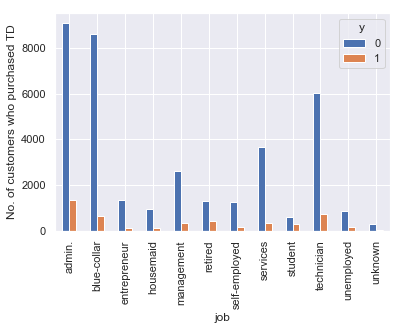

In [11]:
sns.set()
dataset=data[['y','job']]
dataset.pivot_table(index='job' , columns='y'  , aggfunc = len).plot(kind='bar')
plt.ylabel('No. of customers who purchased TD')

#### Marital Status:

Now , we will explore the rest of the variables starting with marital status.As you can see the marital status is not such a great predictor for the outcome variable. Here , I am goig to plot the proportions for each value of the marital status variable.

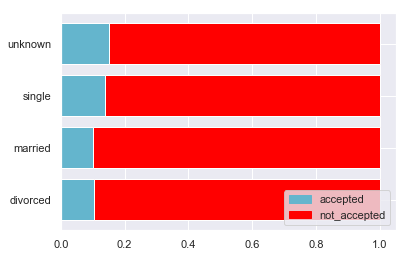

In [12]:
import matplotlib.patches as mpatches


final=data.groupby('marital').count()
t1=accept.groupby('marital').count()
t2=not_accept.groupby('marital').count()
y=t1.index
g=[]
h=[]
for i in range(0,len(t1['y'])):
    g.append(t1['y'][i]/final['y'][i])

for i in range(0,len(t1['y'])):
    h.append(t2['y'][i]/final['y'][i])    
    
cyan_patch = mpatches.Patch(color='c' , label='accepted')
red_patch = mpatches.Patch(color='red' , label='not_accepted')
    
plt.barh(y,g,color='c')
plt.barh(y,h,color="red",left=g)
plt.legend(handles=[cyan_patch,red_patch] , loc='lower right')
plt.show()

Education type can be a good predictor for the outcome:

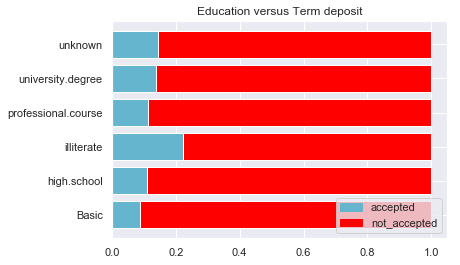

In [13]:
import matplotlib.patches as mpatches

final=data.groupby('education').count()
t1=accept.groupby('education').count()
t2=not_accept.groupby('education').count()
y=t1.index
g=[]
h=[]
for i in range(0,len(t1['y'])):
    g.append(t1['y'][i]/final['y'][i])

for i in range(0,len(t1['y'])):
    h.append(t2['y'][i]/final['y'][i]) 
    
cyan_patch = mpatches.Patch(color='c' , label='accepted')
red_patch = mpatches.Patch(color='red' , label='not_accepted')

plt.barh(y,g,color='c')
plt.barh(y,h,color="red",left=g)
plt.title('Education versus Term deposit')
plt.legend(handles=[cyan_patch,red_patch] , loc='lower right')
plt.show()

In [14]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,Basic,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,Basic,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


Next , for numerical variables we use a method called permutation importance provides a way to compute feature importances for any black-box estimator by measuring how score decreases when a feature is not available .We first train the model with numeric variables and then using permutation importance report the change in score if a particular feature is ignored. We will exlore the variables which have a high importance. More information about feature importance can be found here: https://eli5.readthedocs.io/en/latest/blackbox/permutation_importance.html#eli5-permutation-importance and
https://www.kaggle.com/dansbecker/permutation-importance

In [15]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

g=(data['y'])
feature_names = [i for i in data.columns if data[i].dtype in [np.float64,np.int64]]
X = data[feature_names].drop('y', axis=1)
train_X, val_X, train_y, val_y = train_test_split(X, g, random_state=1)
my_model = RandomForestClassifier(random_state=0).fit(train_X, train_y)

C:\Users\pilan\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [16]:
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(my_model, random_state=1).fit(val_X, val_y)
eli5.show_weights(perm, feature_names = val_X.columns.tolist())

Weight,Feature
0.0521 ± 0.0084,duration
0.0218 ± 0.0011,euribor3m
0.0199 ± 0.0026,nr_employed
0.0094 ± 0.0004,pdays
0.0050 ± 0.0021,emp_var_rate
0.0047 ± 0.0022,age
0.0044 ± 0.0010,cons_conf_idx
0.0036 ± 0.0034,campaign
0.0018 ± 0.0011,previous
0.0014 ± 0.0019,cons_price_idx


As we have seen that weight of the feature duration is higher than the rest meaning that the model is greatly affected by 'duration' and is important. As also, it is affected by the 'euribo3m','nr_employed','pdays' feature and too a little extent by the 'age' feature.

#### Poutcome

Text(0, 0.5, 'No. of customers who purchased TD')

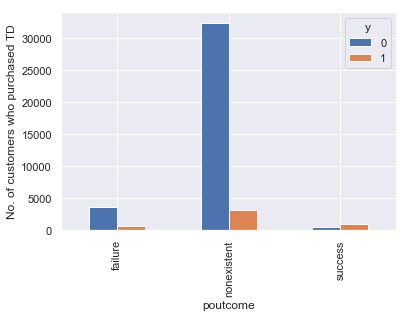

In [17]:
sns.set()
dataset=data[['y','poutcome']]
dataset.pivot_table(index='poutcome' , columns='y'  , aggfunc = len).plot(kind='bar')
plt.ylabel('No. of customers who purchased TD')

Text(0, 0.5, 'No. of customers who purchased TD')

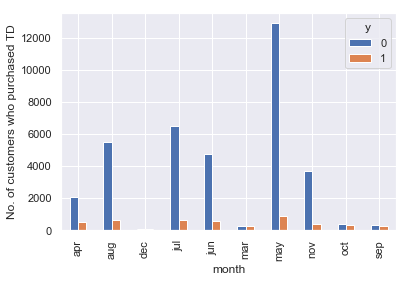

In [18]:
sns.set()
dataset=data[['y','month']]
dataset.pivot_table(index='month' , columns='y'  , aggfunc = len).plot(kind='bar')
plt.ylabel('No. of customers who purchased TD')

One hot encoding:
    One of the main reasons why one-hot encoding is done is to convert the categorical variables into numerical variables so that it becomes easy for algorithms which require the same.

In [19]:
vars = ['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']
cols=list(data.columns.values.tolist())
new_cols=[]
for i in vars:
    if i in cols:
        final=data[i].unique()
        for j in final:
            new_cols.append(j+'_'+i)
new_cols

['blue-collar_job',
 'technician_job',
 'management_job',
 'services_job',
 'retired_job',
 'admin._job',
 'housemaid_job',
 'unemployed_job',
 'entrepreneur_job',
 'self-employed_job',
 'unknown_job',
 'student_job',
 'married_marital',
 'single_marital',
 'divorced_marital',
 'unknown_marital',
 'Basic_education',
 'unknown_education',
 'university.degree_education',
 'high.school_education',
 'professional.course_education',
 'illiterate_education',
 'unknown_default',
 'no_default',
 'yes_default',
 'yes_housing',
 'no_housing',
 'unknown_housing',
 'no_loan',
 'yes_loan',
 'unknown_loan',
 'cellular_contact',
 'telephone_contact',
 'aug_month',
 'nov_month',
 'jun_month',
 'apr_month',
 'jul_month',
 'may_month',
 'oct_month',
 'mar_month',
 'sep_month',
 'dec_month',
 'thu_day_of_week',
 'fri_day_of_week',
 'tue_day_of_week',
 'mon_day_of_week',
 'wed_day_of_week',
 'nonexistent_poutcome',
 'success_poutcome',
 'failure_poutcome']

In [34]:
vars= ['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']
datas=data
datas=pd.get_dummies(datas,prefix=vars)

In [35]:
y=data['y']
X=datas.drop(['y'],axis=1)
X.head()


,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,44,210,1,999,0,1.4,93.444,-36.1,4.963,5228.1,...,0,0,0,0,1,0,0,0,1,0
1,53,138,1,999,0,-0.1,93.200,-42.0,4.021,5195.8,...,0,0,1,0,0,0,0,0,1,0
2,28,339,3,6,2,-1.7,94.055,-39.8,0.729,4991.6,...,0,0,0,0,1,0,0,0,0,1
3,39,185,2,999,0,-1.8,93.075,-47.1,1.405,5099.1,...,0,0,1,0,0,0,0,0,1,0
4,55,137,1,3,1,-2.9,92.201,-31.4,0.869,5076.2,...,0,0,1,0,0,0,0,0,0,1


#### Logistic Regression Model Fitting

Here , we predict the results and calculate the accuracy , but first we apply feature selection

#### Recursive Feature Elimination 

 The goal of RFE is to select features by recursively considering smaller and smaller sets of features.

In [27]:
data_vars=datas.columns.values.tolist()
to_keep=[i for i in data_vars if i not in vars]
to_keep
data_final=datas[to_keep]
data_final.columns.values

array(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp_var_rate',
       'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'y',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student',
       'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_Basic', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'education_unknown', 'default_no',
       'default_unknown', 'default_yes', 'housing_no', 'housing_unknown',
       'housing_yes', 'loan_no', 'loan_unknown', 'loan_yes',
       'contact_cellular', 'contact_telephone', 'month_apr', 'month_aug',
       'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may',
       'month_nov', 'month_oct', 'month_sep', 'day_of_week_fri',

In [48]:
data_final_vars=data_final.columns.values.tolist()
yh=['y']
Xh=[i for i in data_final_vars if i not in y]
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
rfe = RFE(logreg, 20)
rfe = rfe.fit(X, y.values.ravel())
print(rfe.support_)
print(rfe.ranking_)


C:\Users\pilan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\pilan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\pilan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\pilan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\pilan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

C:\Users\pilan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\pilan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[False False False False  True False False False  True False False  True
 False False False  True False  True  True False False False False False
 False False  True  True False False False False  True False False False
 False False False False False False  True  True  True  True False False
  True  True  True False False False  True False False False  True  True
  True]
[33 31 12 39  1 16 18 20  1 28 11  1 26 38 36  1 29  1  1 21 22 40  6  7
  8 41  1  1 37  2  3  4  1 15 42 34 13 35 19 17 14 25  1  1  1  1 23 24
  1  1  1 30 10  9  1 32 27  5  1  1  1]


Now we select the columns which are selected by our feature engineering model, 

In [62]:
rfe_vars=list(rfe.support_)
#data_final_vars2=data_final_vars.remove('y')
select_vars = [data_final_vars[i] for i in range(0,len(data_final_vars)) if rfe_vars[i]==True ]
select_vars

['previous',
 'euribor3m',
 'job_blue-collar',
 'job_retired',
 'job_services',
 'job_student',
 'education_Basic',
 'education_high.school',
 'default_no',
 'contact_telephone',
 'month_apr',
 'month_aug',
 'month_dec',
 'month_mar',
 'month_may',
 'month_nov',
 'day_of_week_mon',
 'poutcome_failure',
 'poutcome_nonexistent',
 'poutcome_success']

These are the reduced features which we will use for training our model. Now, we select only these values now.

In [63]:
X=X[select_vars]

In [64]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.280952
         Iterations 7
                            Results: Logit
Model:                 Logit             Pseudo R-squared:  0.202     
Dependent Variable:    y                 AIC:               23183.6741
Date:                  2019-07-23 21:39  BIC:               23356.1922
No. Observations:      41188             Log-Likelihood:    -11572.   
Df Model:              19                LL-Null:           -14499.   
Df Residuals:          41168             LLR p-value:       0.0000    
Converged:             1.0000            Scale:             1.0000    
No. Iterations:        7.0000                                         
----------------------------------------------------------------------
                       Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
----------------------------------------------------------------------
previous               0.2102   0.0510   4.1197 0.0000  0.1102  0.3103
eur

We will remove all the variables which have a very high p-value.This will act as a feature elimination step.

In [66]:
vars=['job_services','education_Basic','education_high.school' , 'month_dec']
X=X.drop(vars,axis=1)

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
columns = X_train.columns

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

C:\Users\pilan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy of logistic regression classifier on test set: 0.90


#### Confusion Matrix: 

In [68]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[10875   106]
 [ 1107   269]]


 The precision is the ability of the classifier to not label a sample as positive if it is negative.The recall is intuitively the ability of the classifier to find all the positive samples(i.e correctly classify all the positive samples as positive and negative as negative).

In [69]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95     10981
           1       0.72      0.20      0.31      1376

   micro avg       0.90      0.90      0.90     12357
   macro avg       0.81      0.59      0.63     12357
weighted avg       0.89      0.90      0.88     12357



An	ROC	curve	has	the	following	important	properties:

Any	increase	in	Sensitivity(True	Negative	Rate)	will	decrease	the	Specificity(True	Negative	Rate)

The	closer	the	curve	is	to	the	left	and	upper	border	of	the	quadrant,	the	better	the model	prediction 

The	closer	the	curve	is	to	the	diagonal	line,	the	worse	the	model	prediction	is 

The	larger	the	area	under	the	curve,	the	better	the	prediction

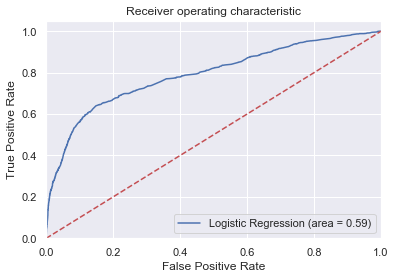

In [70]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()